# Kuis Machine Learning Pertemuan 4

NIM : 2241727022
Nama : Mohammad Durisa Enama Aprilian
Kelas : 4-J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [6]:
# baca data
data = pd.read_csv('score_science.csv')
data.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


In [7]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86570 entries, 0 to 86569
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            86570 non-null  int64
 1   id_first_major        86570 non-null  int64
 2   id_first_university   86570 non-null  int64
 3   id_second_major       86570 non-null  int64
 4   id_second_university  86570 non-null  int64
 5   id_user               86570 non-null  int64
 6   score_bio             86570 non-null  int64
 7   score_fis             86570 non-null  int64
 8   score_kim             86570 non-null  int64
 9   score_kmb             86570 non-null  int64
 10  score_kpu             86570 non-null  int64
 11  score_kua             86570 non-null  int64
 12  score_mat             86570 non-null  int64
 13  score_ppu             86570 non-null  int64
dtypes: int64(14)
memory usage: 9.2 MB


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
count,86570.000000,8.657000e+04,86570.000000,8.657000e+04,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000
mean,43284.500000,3.510065e+06,350.987317,3.482497e+06,348.189199,177509.875523,537.140522,539.335312,544.598036,565.798094,569.942879,569.147141,529.489303,544.597158
std,24990.750739,1.192799e+06,119.206515,1.258767e+06,125.840155,95418.883782,96.596624,102.293095,112.595368,95.166847,91.224084,111.385700,99.464651,87.436377
min,0.000000,1.496000e+03,46.000000,1.025000e+03,33.000000,4.000000,245.000000,252.000000,213.000000,198.000000,193.000000,266.000000,219.000000,219.000000
25%,21642.250000,3.311094e+06,331.000000,3.241092e+06,324.000000,96827.250000,471.000000,468.000000,465.000000,500.000000,508.000000,489.000000,463.000000,487.000000
50%,43284.500000,3.531313e+06,353.000000,3.531321e+06,355.000000,183176.500000,531.000000,531.000000,536.000000,565.000000,571.000000,563.000000,520.000000,547.000000
75%,64926.750000,3.721232e+06,372.000000,3.721263e+06,372.000000,257122.750000,597.000000,604.000000,616.000000,632.000000,633.000000,645.000000,586.000000,604.000000
max,86569.000000,9.211352e+06,921.000000,9.211352e+06,921.000000,344192.000000,1000.000000,1070.000000,1044.000000,908.000000,881.000000,922.000000,1123.000000,842.000000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

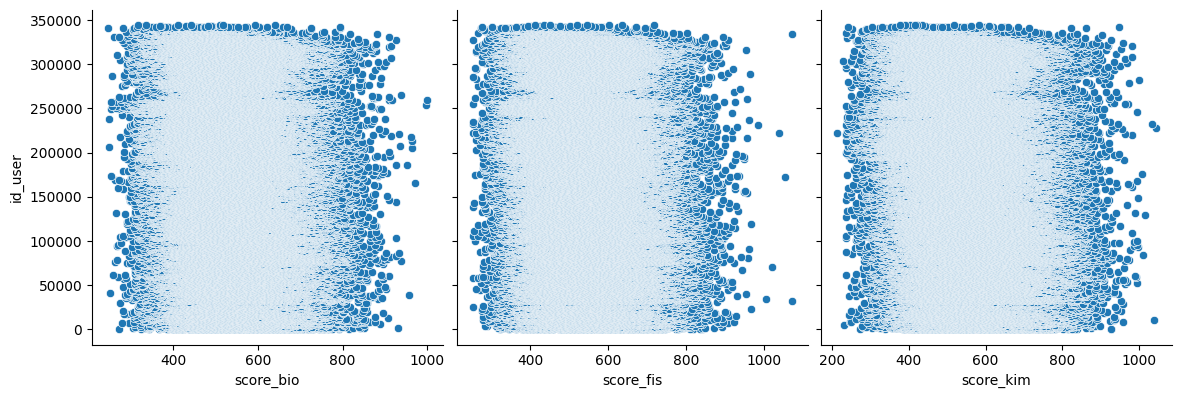

In [19]:
# operasi visualisasi
sns.pairplot(data, x_vars=['score_bio', 'score_fis','score_kim'], 
             y_vars='id_user', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

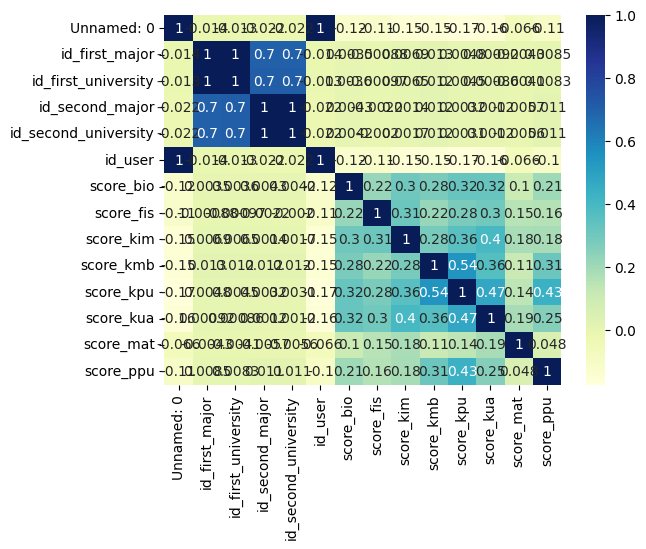

In [20]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [22]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['score_bio']
y = data['id_user']

In [23]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [24]:
# hasil training dtaset
X_train
y_train

74327    296133
7355      38739
19221     87493
24557    107801
72698    290246
          ...  
81840    320543
65615    259278
77655    307089
79683    313635
56088    225715
Name: id_user, Length: 60598, dtype: int64

In [25]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [26]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const        240240.531726
score_bio      -116.985413
dtype: float64

In [27]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                id_user   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     860.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.91e-188
Time:                        14:01:49   Log-Likelihood:            -7.8040e+05
No. Observations:               60598   AIC:                         1.561e+06
Df Residuals:                   60596   BIC:                         1.561e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.402e+05   2176.357    110.387      0.000    2.36e+05    2.45e+05
score_bio   -116.9854      3.987    -29.339      0.000    -124.801    -109.170
==============================================================================
Omnibus:                    27886.417   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3203.345
Skew:                          -0.076   Prob(JB):                         0.00
Kurtosis:                       1.884   Cond. No.                     3.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

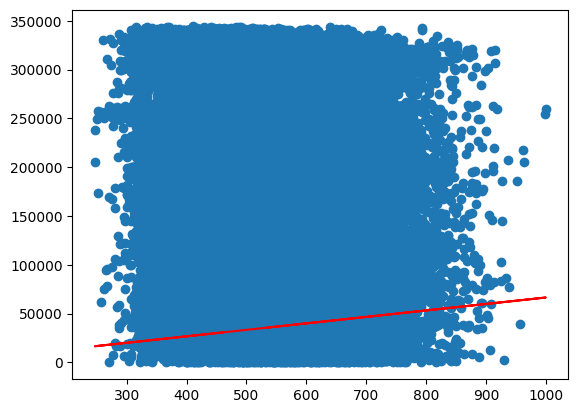

In [28]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [29]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

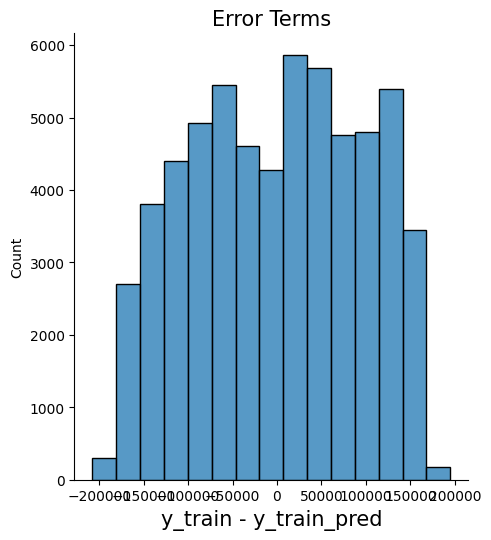

In [35]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

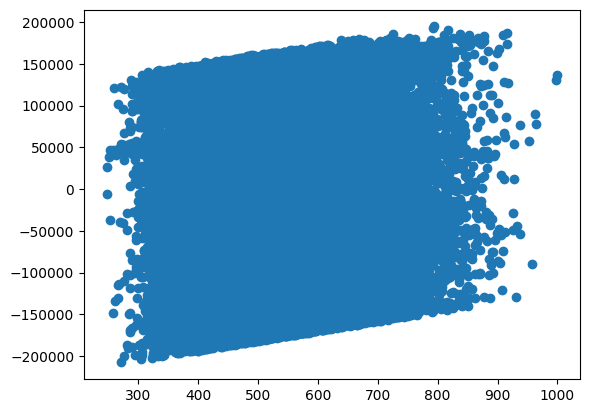

In [31]:
plt.scatter(X_train,res)
plt.show()

In [32]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

82228    182683.708566
62500    200465.491331
11985    192744.454078
56965    175781.569204
81984    179057.160766
dtype: float64

In [33]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.015493135770165312

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.273 sedangkan dari data testing adalah 0.200. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

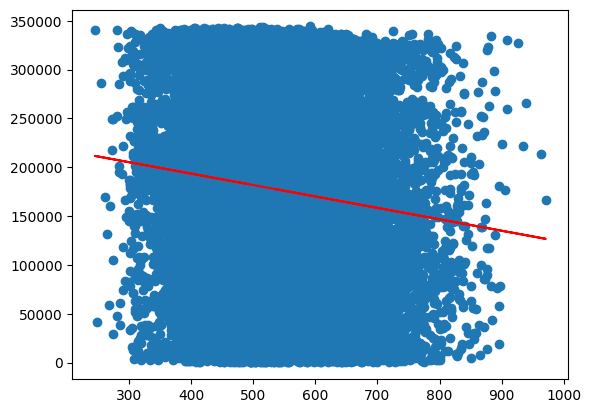

In [34]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()